# **Самостійна робота з дисципліни "Прикладна аналітика при розробці ІТ"**

---

**Виконав:**

студент групи УП-12

Стельмах О.Ю.


**Перевірив:**

Єгорченков О.В.

# **1. Dataset description**

Набір даних містить інформацію про погодні умови в період з 1979 по 2021, що були записані метеостанцією поблизу аеропорту Хітроу в Лондоні, Великобританія.

Складається з стовпців:



1. date - зареєстрована дата вимірювання - (int)
2. cloud_cover - вимірювання хмарності в октах - (float)
3. sunshine - вимірювання сонячного світла в годинах - (float)
4. global_radiation - вимірювання опромінення у Ватах на квадратний метр (W/m2) - (float)
5. max_temp - максимальна зареєстрована температура в градусах Цельсія (°C) - (float)
6. mean_temp - середня температура в градусах Цельсія (°C) - (float)
7. min_temp - мінімальна зареєстрована температура в градусах Цельсія (°C) - (float)
8. precipitation - вимірювання опадів у міліметрах (mm) - (float)
9. pressure - вимірювання тиску в паскалях (Pa) - (float)
10. snow_depth - вимірювання глибини снігу в сантиметрах (cm) - (float)


# **2. Data reading**

In [120]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from math import isnan 
from datetime import datetime, timedelta

In [121]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [123]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/london_weather.csv')
df


,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
0,19790101,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0
1,19790102,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0
2,19790103,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0
3,19790104,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0
4,19790105,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0
...,...,...,...,...,...,...,...,...,...,...
15336,20201227,1.0,0.9,32.0,7.5,7.5,7.6,2.0,98000.0,0.0
15337,20201228,7.0,3.7,38.0,3.6,1.1,-1.3,0.2,97370.0,0.0
15338,20201229,7.0,0.0,21.0,4.1,2.6,1.1,0.0,98830.0,0.0
15339,20201230,6.0,0.4,22.0,5.6,2.7,-0.1,0.0,100200.0,0.0


# **3. Data tidying**

Створимо загальний опис даних:

In [124]:
df.describe()

,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
count,1.534100e+04,15341.000000,15341.000000,15341.000000,15341.000000,15305.000000,15341.000000,15341.000000,15341.000000,14044.000000
mean,1.999567e+07,5.269409,4.350238,118.878691,15.390437,11.475511,7.560061,1.668262,101536.596050,0.037646
std,1.212176e+05,2.070050,4.028339,88.923469,6.555903,5.729709,5.326436,3.737920,1049.667963,0.542851
min,1.979010e+07,0.000000,0.000000,8.000000,-6.200000,-7.600000,-11.800000,0.000000,95960.000000,0.000000
25%,1.989070e+07,4.000000,0.500000,41.000000,10.500000,7.000000,3.500000,0.000000,100920.000000,0.000000
50%,2.000010e+07,6.000000,3.500000,95.000000,15.000000,11.400000,7.800000,0.000000,101620.000000,0.000000
75%,2.010070e+07,7.000000,7.200000,186.000000,20.300000,16.000000,11.800000,1.600000,102240.000000,0.000000
max,2.020123e+07,9.000000,16.000000,402.000000,37.900000,29.000000,22.300000,61.800000,104820.000000,22.000000


Перевіряємо стовпці на наявність NaN значень:

In [126]:
print("Загальна кількість рядків: " + str(df.shape[0]))
df.isna().sum()

Загальна кількість рядків: 15341


date                   0
cloud_cover            0
sunshine               0
global_radiation       0
max_temp               0
mean_temp             36
min_temp               0
precipitation          0
pressure               0
snow_depth          1297
dtype: int64

Для того щоб зробити дані більш охайними виконаємо наступні дії:
1. Зробимо дату більш читабельною і змінимо тип.
2. Для всіх рядків, що містять значення NaN для колонки snow_depth встановлюємо 0 якщо значення колонки min_temp є більшим нуля.
3. Для всіх рядків, що містять значення NaN для колонки mean_temp встановлюємо середнє між значенням колонок min_temp та max_teap.

In [127]:
result_df = df.copy()
for i in range(df.shape[0]):

  #1
  date = str(df['date'][i])
  if '-' not in date:
    result_df.at[i, 'date'] = datetime(year=int(date[0:4]), month=int(date[4:6]), day=int(date[6:8])).date()

  #2
  if (isnan(df['snow_depth'][i]) and df['min_temp'][i] > 0):
    result_df.at[i,'snow_depth'] = 0

  #3
  min_temp = df['min_temp'][i]
  max_temp = df['max_temp'][i]
  if (isnan(df['mean_temp'][i])):
    result_df.at[i, 'mean_temp'] = (min_temp + max_temp) / 2

Перевіряємо стовпці на наявність NaN значень:

In [131]:
print("Загальна кількість рядків: " + str(result_df.shape[0]))
result_df.isna().sum()

Загальна кількість рядків: 15341


date                0
cloud_cover         0
sunshine            0
global_radiation    0
max_temp            0
mean_temp           0
min_temp            0
precipitation       0
pressure            0
snow_depth          0
dtype: int64

Фінальний датафрейм, що містить усі дані:

In [132]:
result_df

,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
0,1979-01-01,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0
1,1979-01-02,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0
2,1979-01-03,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0
3,1979-01-04,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0
4,1979-01-05,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0
...,...,...,...,...,...,...,...,...,...,...
15336,2020-12-27,1.0,0.9,32.0,7.5,7.5,7.6,2.0,98000.0,0.0
15337,2020-12-28,7.0,3.7,38.0,3.6,1.1,-1.3,0.2,97370.0,0.0
15338,2020-12-29,7.0,0.0,21.0,4.1,2.6,1.1,0.0,98830.0,0.0
15339,2020-12-30,6.0,0.4,22.0,5.6,2.7,-0.1,0.0,100200.0,0.0


In [133]:
result_df.set_index('date')
result_df.describe()

,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
count,15341.000000,15341.000000,15341.000000,15341.000000,15341.000000,15341.000000,15341.000000,15341.000000,15341.000000
mean,5.269409,4.350238,118.878691,15.390437,11.479017,7.560061,1.668262,101536.596050,0.034463
std,2.070050,4.028339,88.923469,6.555903,5.729857,5.326436,3.737920,1049.667963,0.519500
min,0.000000,0.000000,8.000000,-6.200000,-7.600000,-11.800000,0.000000,95960.000000,0.000000
25%,4.000000,0.500000,41.000000,10.500000,7.100000,3.500000,0.000000,100920.000000,0.000000
50%,6.000000,3.500000,95.000000,15.000000,11.400000,7.800000,0.000000,101620.000000,0.000000
75%,7.000000,7.200000,186.000000,20.300000,16.000000,11.800000,1.600000,102240.000000,0.000000
max,9.000000,16.000000,402.000000,37.900000,29.000000,22.300000,61.800000,104820.000000,22.000000


# **4. Data analyzing with graphics.**

Побудуємо графік для порівняння середньої температури протягом року для 1980 та 2020 років:

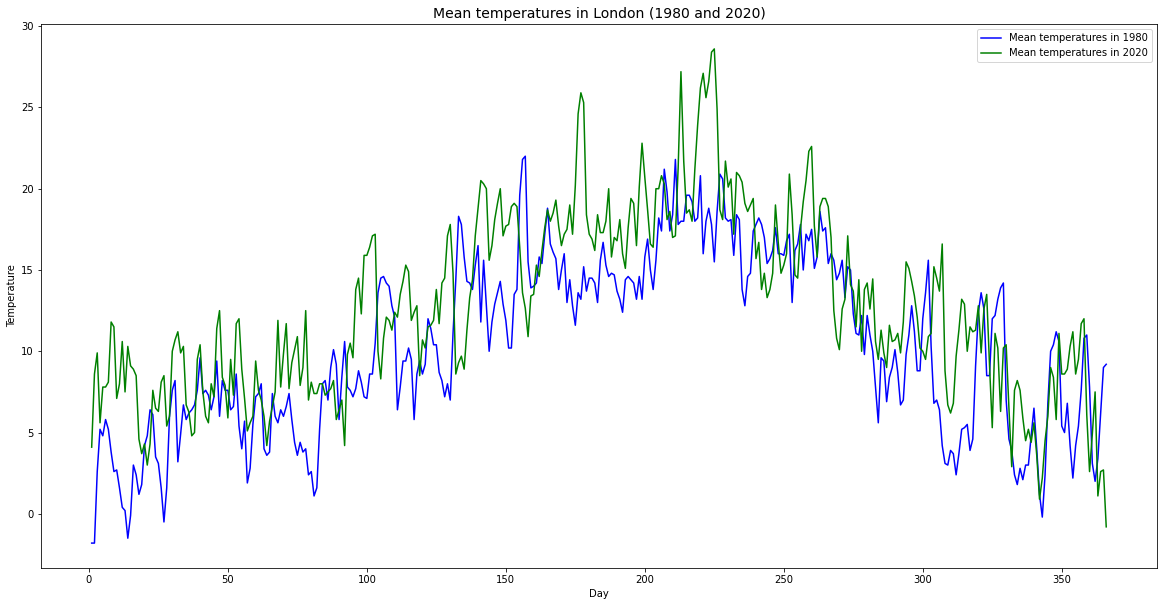

In [134]:
data1980 = result_df['mean_temp'][365:365+366]
data2020 = result_df['mean_temp'][result_df.shape[0]-366:]
daysOfYear = list(range(1, 367))

fig, ax = plt.subplots(figsize=(20, 10))
ax.plot(daysOfYear, data1980, color = 'blue', label = 'Mean temperatures in 1980')
ax.plot(daysOfYear, data2020, color = 'green', label = 'Mean temperatures in 2020')
ax.set_xlabel('Day')
ax.set_ylabel('Temperature')
ax.set_title('Mean temperatures in London (1980 and 2020)', fontsize=14)
ax.legend()

Наступним етапом є побудова графіку для порівняння кількості опадів протягом року для 1980 та 2020 років.

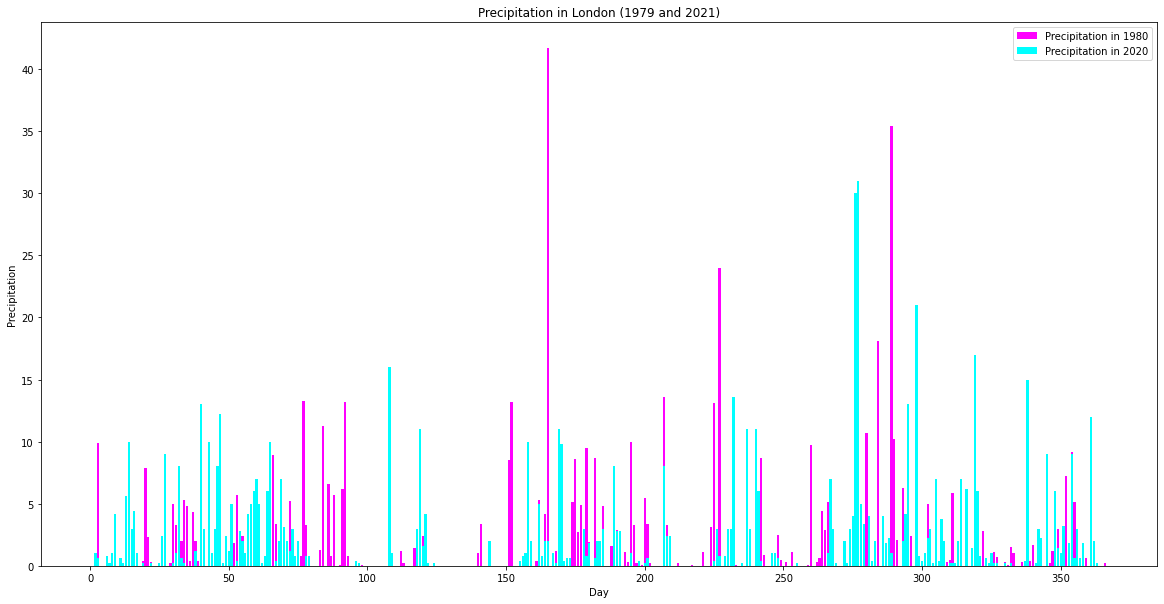

In [135]:
data1980 = result_df['precipitation'][365:365+366]
data2020 = result_df['precipitation'][result_df.shape[0]-366:]
daysOfYear = list(range(1, 367))

fig, ax = plt.subplots(figsize=(20, 10))
ax.bar(daysOfYear, data1980, color = 'magenta', label = 'Precipitation in 1980')
ax.bar(daysOfYear, data2020, color = 'cyan', label = 'Precipitation in 2020')
ax.set_xlabel('Day')
ax.set_ylabel('Precipitation')
ax.set_title('Precipitation in London (1979 and 2021)')
ax.legend()

Для 2020 року побудуємо точковий графік та лінію кореляції між значенням сонячного опромінення та значенням кількості годин сонячного світла протягом дня. 

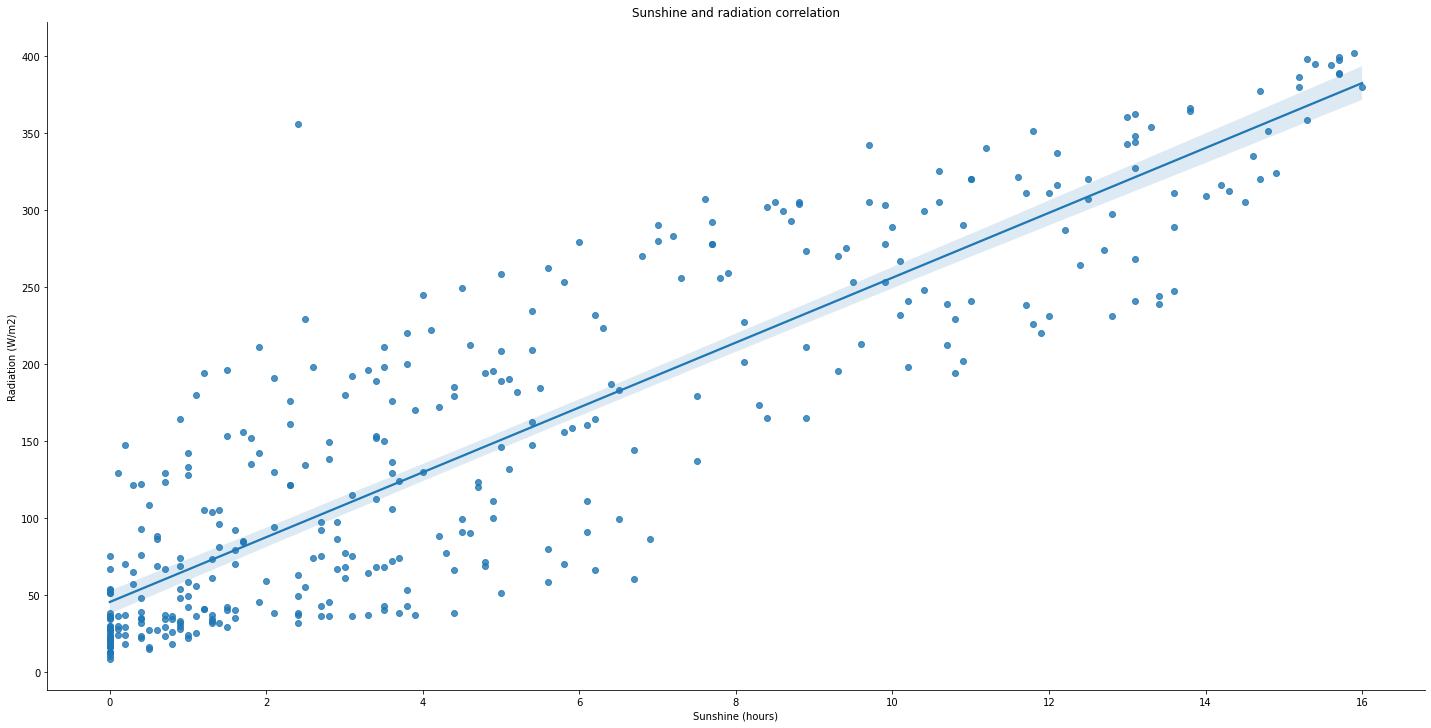

In [136]:
data2020 = result_df.iloc[result_df.shape[0]-366:, 0:10]
sns.lmplot(x="sunshine", 
           y="global_radiation", 
           data=data2020, 
           height=10, 
           aspect=2/1).set(title='Sunshine and radiation correlation', 
                           xlabel='Sunshine (hours)', 
                           ylabel='Radiation (W/m2)')

Побудуємо графік на якому покажемо тиск та кількість опадів. Для кожного з них визначимо власну Y-вісь.

Text(0.5, 1.0, 'Precipitation and pressure')

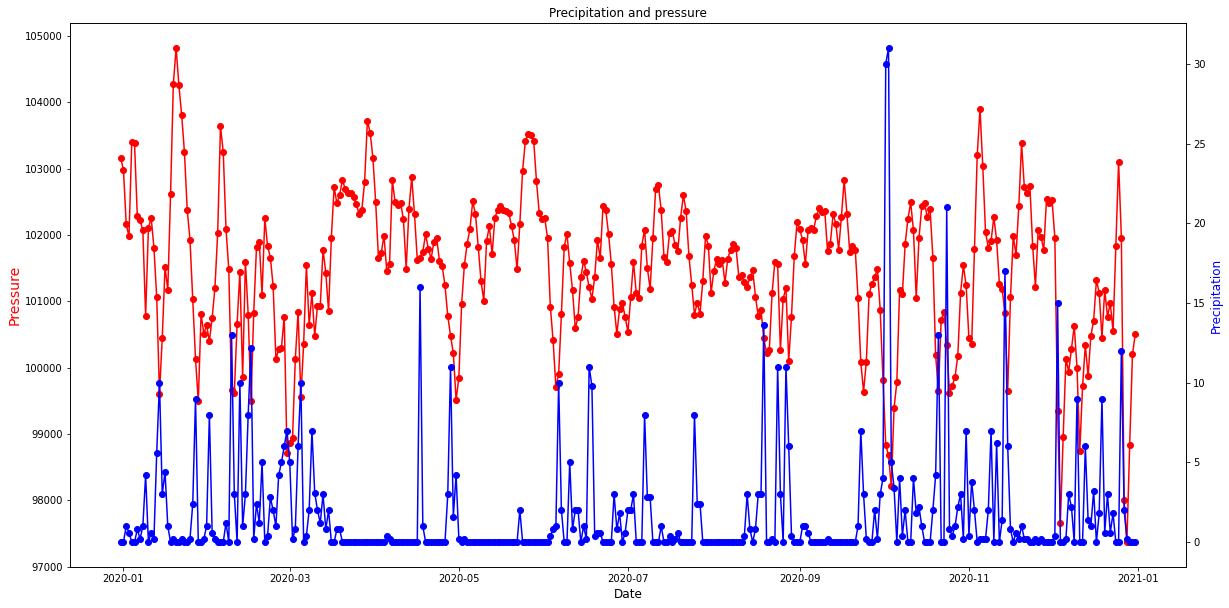

In [137]:
data2020 = result_df.iloc[result_df.shape[0]-367:, 0:10]
fig,ax = plt.subplots(figsize=(20, 10))
ax.plot(data2020['date'],
        data2020['pressure'],
        color="red", 
        marker="o")

ax.set_xlabel("Date", fontsize = 12)
ax.set_ylabel("Pressure", color="red", fontsize=14)

ax2=ax.twinx()
ax2.plot(data2020['date'], data2020['precipitation'], color="blue", marker="o")
ax2.set_ylabel("Precipitation", color="blue", fontsize=12)

ax.set_title("Precipitation and pressure", fontsize=12)

Наступним є графік на якому показано хмарність в октах та кількість опадів. Можна простежити залежність: при більшій хмарності частіше присутні опади та в більшій кількості.

Text(0, 0.5, 'Precipitation (mm)')

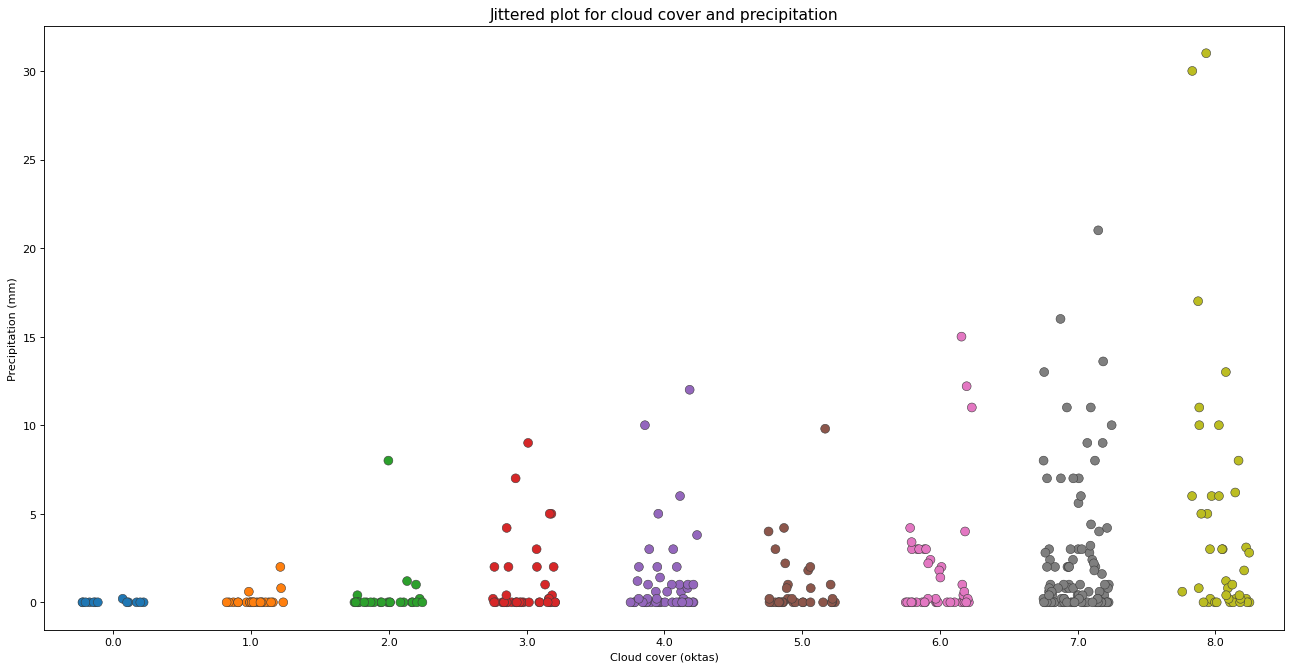

In [138]:
data2020 = result_df.iloc[result_df.shape[0]-366:, 0:10]
fig, ax = plt.subplots(figsize=(20,10), dpi=80)    
sns.stripplot(x=data2020['cloud_cover'], y=data2020['precipitation'], jitter=0.25, size=8, ax=ax, linewidth=.5)
plt.title("Jittered plot for cloud cover and precipitation", fontsize=14)
plt.xlabel("Cloud cover (oktas)")
plt.ylabel("Precipitation (mm)")

Останнім графіком є графік на якому показано мінімальні та максимальні температури в Лондоні протягом 2020 року.

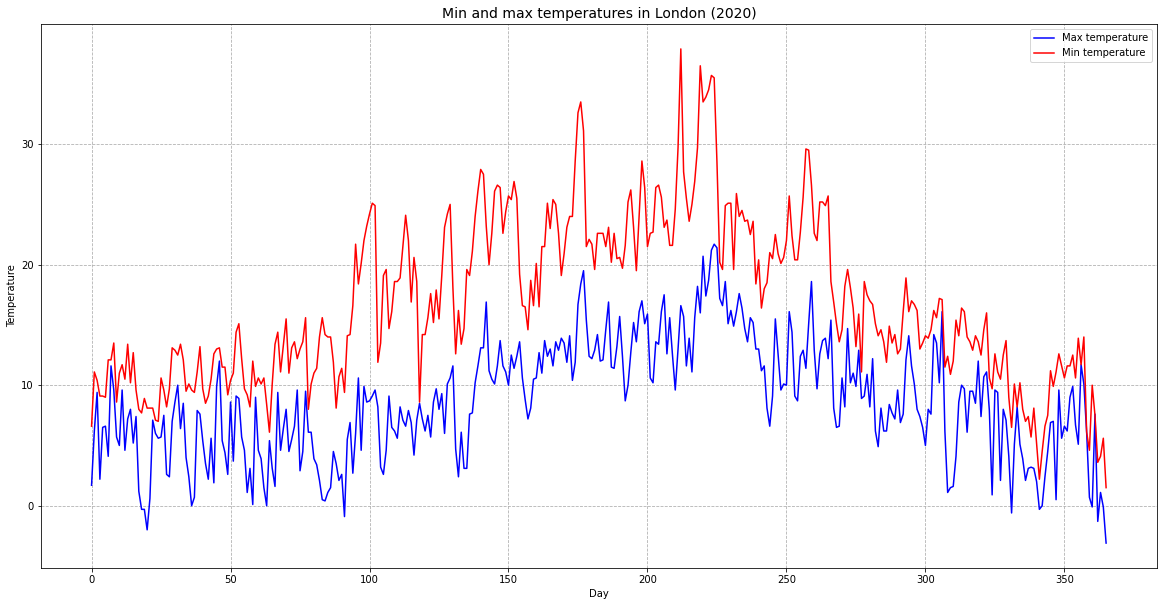

In [139]:
#data1980 = result_df['mean_temp'][365:365+366]
min_temp_data2020 = result_df['min_temp'][result_df.shape[0]-366:]
max_temp_data2020 = result_df['max_temp'][result_df.shape[0]-366:]
daysOfYear = list(range(0, 366))

fig, ax = plt.subplots(figsize=(20, 10))
ax.plot(daysOfYear, min_temp_data2020, color = 'blue', label = 'Max temperature')
ax.plot(daysOfYear, max_temp_data2020, color = 'red', label = 'Min temperature')
ax.set_xlabel('Day')
ax.set_ylabel('Temperature')
ax.set_title('Min and max temperatures in London (2020)', fontsize=14)
ax.legend()
ax.grid(linestyle = '--')